In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.dpi':180})

import sys
sys.path.append("/home/msdos/DESI-QA/desiarc-main/arc")
sys.path.append("/home/msdos/DESI-QA/")
sys.path.append("/home/msdos/DESI-QA/output/figures/")
import find_center as fc
from spotfinder import spotfinder
from xylib import calc_movetables as cm
import reportlib as rl

figPath = '/home/msdos/DESI-QA/output/figures/Backlash test/'

In [12]:
testStart = np.datetime64('2023-07-05 12:27:00')
testFinish = testStart + np.timedelta64(1,"h")

# Setting paths
datapath = "../output/database.csv"
fidpath = "../output/fiddb.csv"
df = rl.importToDf(datapath,fidpath,testStart,testFinish,testType='backlash',motor='theta')

Adding session labels for testType=backlash


### Figure of backlash over time

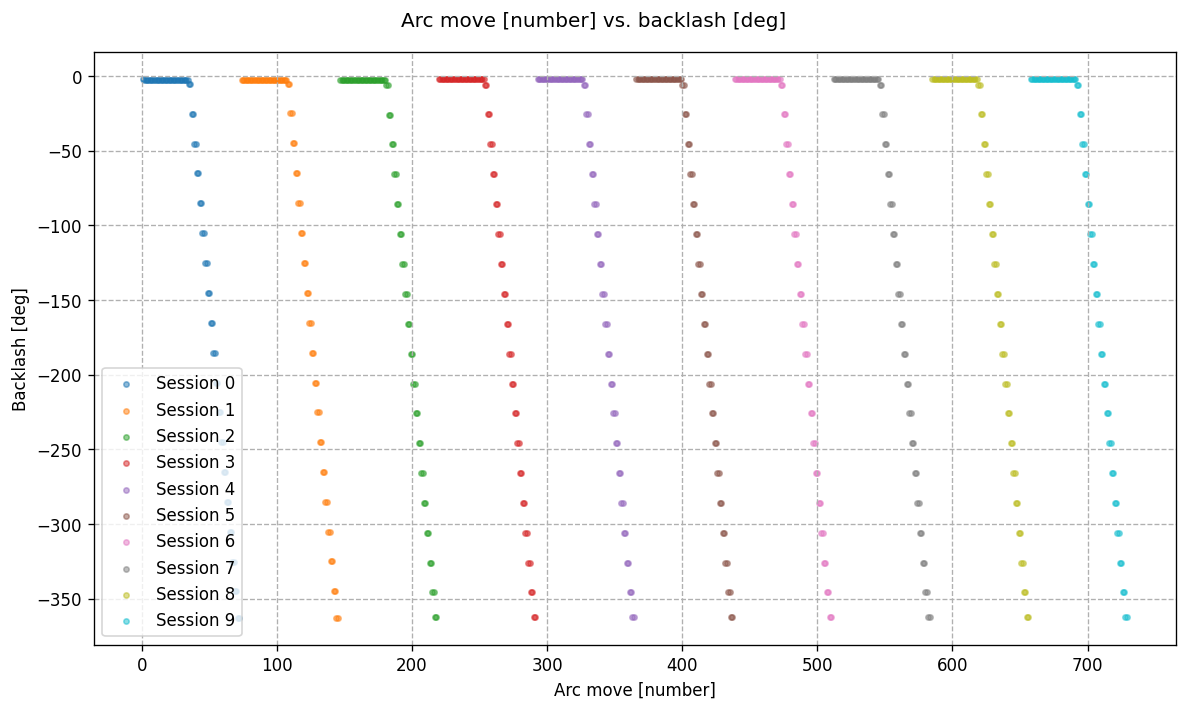

In [13]:
fig, ax = plt.subplots(figsize=[10,6])

scatterkwargs = dict(s = 10,alpha=0.5)

ax.grid(linestyle='--')
fig.suptitle("Arc move [number] vs. backlash [deg]")
ax.set_ylabel("Backlash [deg]")
ax.set_xlabel("Arc move [number]")
last = 0
for j in range(len(np.unique(df['ArcSession']))):
    ax.scatter(np.arange(last,len(df[df["ArcSession"]==j])+last),df[df["ArcSession"]==j]['Backlash'],
               label="Session "+str(j),**scatterkwargs)
    last+=len(df[df["ArcSession"]==j])
# ax.set_ylim(-6,-1.5)
ax.legend()

fig.tight_layout()

plt.show()

### Errorbar figure of median backlash, binned by move size

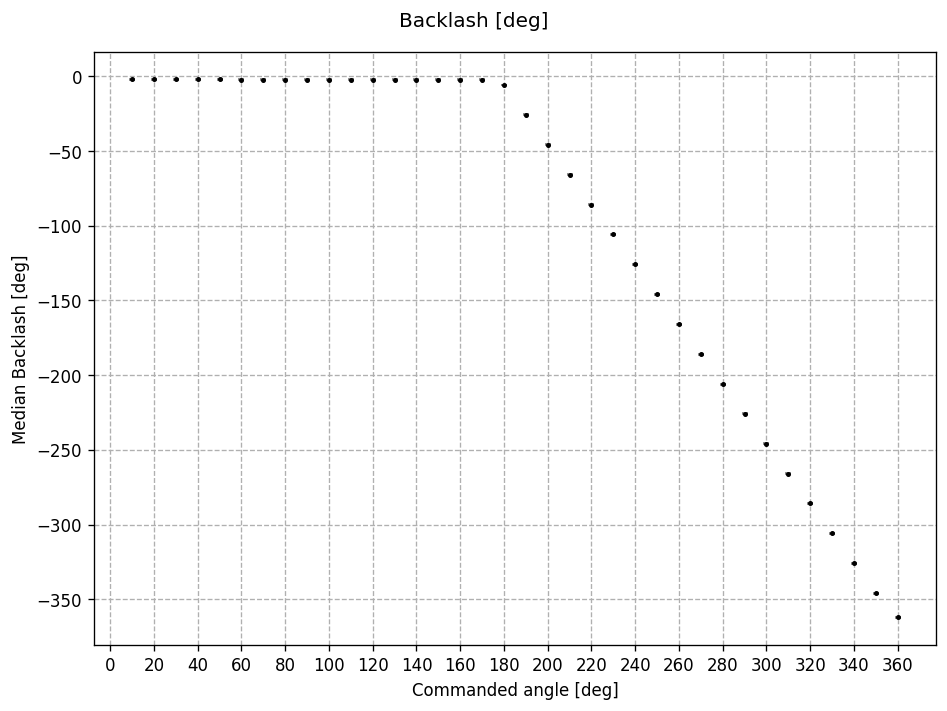

In [14]:
plt.figure(figsize=[8,6])

plt.grid(linestyle='--')
plt.suptitle("Backlash [deg]")
plt.ylabel("Median Backlash [deg]")
plt.xlabel("Commanded angle [deg]")
for k in range(36):
    angle = (k+1)*10
    msk = df['angle']==angle
    scatkwargs = dict(alpha=1,yerr=np.std(df[msk]['Backlash']),fmt='.k', color='blue',
                      ecolor='gray',markersize=4, elinewidth=1, capsize=2)
    
    med_val = np.median(df[msk]['Backlash'])
    plt.errorbar(angle, np.median(df[msk]['Backlash']),**scatkwargs)
plt.xticks(np.arange(0,361,step=20))
# plt.xlim(0,190)
# plt.ylim(-6,-1.5)

plt.tight_layout()

plt.show()

### Errorbar figure of median backlash, binned by move size, excluding 180$^{\circ}$ move

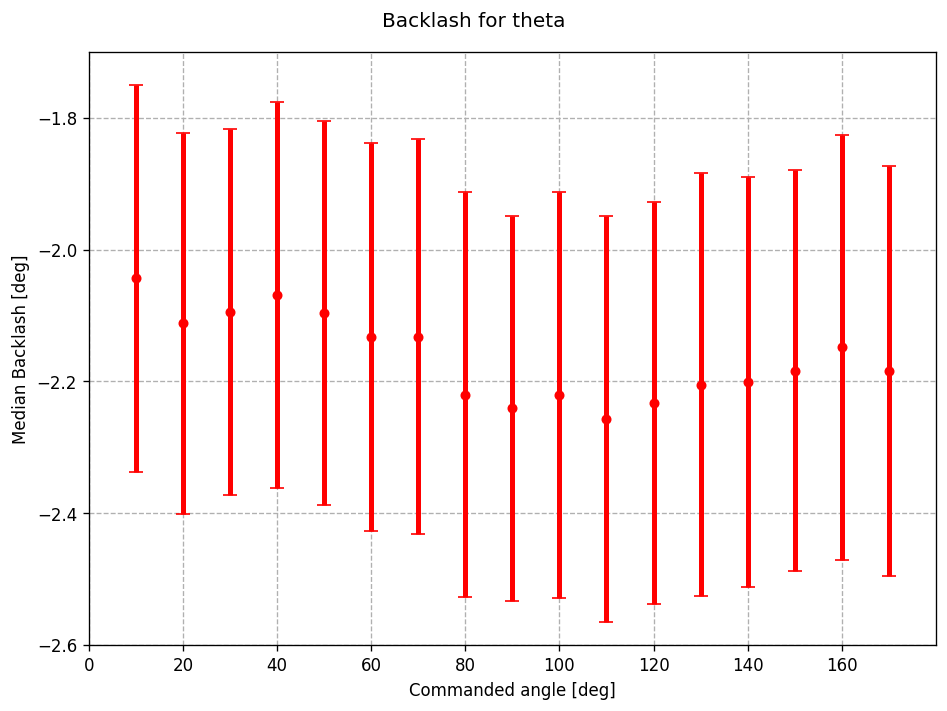

In [17]:
plt.figure(figsize=[8,6])

save = True

title="Backlash for theta"

plt.grid(linestyle='--')
plt.suptitle(title)
plt.ylabel("Median Backlash [deg]")
plt.xlabel("Commanded angle [deg]")
for k in range(17):
    angle = (k+1)*10
    msk = df['angle']==angle
    scatkwargs1 = dict(yerr=np.std(df[msk]['Backlash']),marker='o',markersize=5, elinewidth=3, capsize=4)
    scatkwargs2 = dict(yerr=np.std(df[msk]['Backlash']),marker='o',markersize=5, elinewidth=0, capsize=4)
#     msk1 = (df['direction']=='ccw') & (df['angle']==angle)
#     msk2 = (df['direction']=='cw') & (df['angle']==angle)
    plt.errorbar(angle, np.median(df[msk]['Backlash']),ecolor='red',**scatkwargs1,color='red')
#     plt.errorbar(angle, np.median(df[msk1]['Backlash']),ecolor='blue',**scatkwargs2,color='blue',alpha=0.5)
#     plt.errorbar(angle, np.median(df[msk2]['Backlash']),ecolor='green',**scatkwargs2,color='green',alpha=0.5)
    
plt.xticks(np.arange(0,180,step=20))
plt.xlim(0,180)
plt.ylim(-2.6,-1.7)

plt.tight_layout()

if save:
    plt.savefig(figPath+title+".jpg",dpi=180)

plt.show()

### Statistics of backlash values

In [16]:
print("Median of backlash including 170 degree moves: ",np.nanmedian(df['Backlash']))
print("Minimum backlash including 170 degree moves: ",np.min(df['Backlash']))
print("Maximum backlash including 170 degree moves: ",np.max(df['Backlash']),'\n')

mask = df['angle']<=170

print("Median of backlash excluding 170 degree moves: ",np.nanmedian(df[mask]['Backlash']))
print("Minimum backlash excluding 170 degree moves: ",np.min(df[mask]['Backlash']))
print("Maximum backlash excluding 170 degree moves: ",np.max(df[mask]['Backlash']))

Median of backlash including 170 degree moves:  -15.589768952144624
Minimum backlash including 170 degree moves:  -362.82801439082056
Maximum backlash including 170 degree moves:  -2.014503695753545 

Median of backlash excluding 170 degree moves:  -2.2078971905706553
Minimum backlash excluding 170 degree moves:  -3.027411126305907
Maximum backlash excluding 170 degree moves:  -2.014503695753545


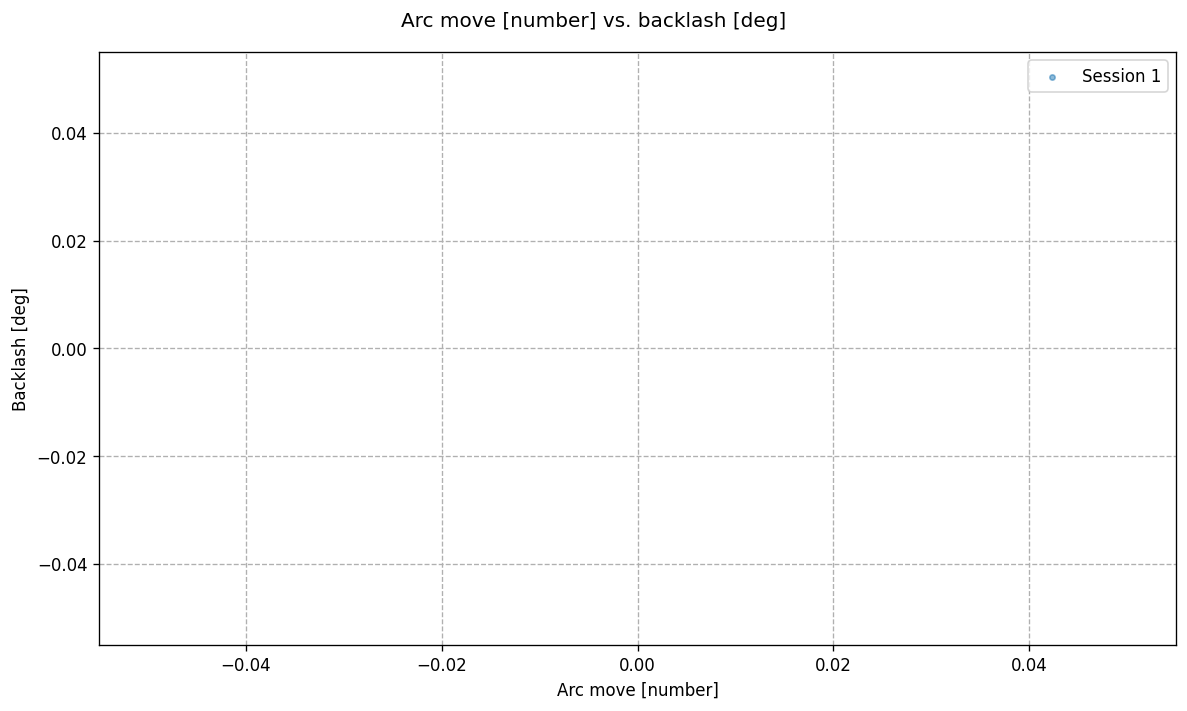

In [7]:
fig, ax = plt.subplots(figsize=[10,6])

scatterkwargs = dict(s = 10,alpha=0.5)

ax.grid(linestyle='--')
fig.suptitle("Arc move [number] vs. backlash [deg]")
ax.set_ylabel("Backlash [deg]")
ax.set_xlabel("Arc move [number]")
j=1
last = 0
# for j in range(len(np.unique(df['ArcSession']))):
ax.scatter(np.arange(last,len(df[df["ArcSession"]==j])+last),df[df["ArcSession"]==j]['Backlash'],
           label="Session "+str(j),**scatterkwargs)
#     last+=len(df[df["ArcSession"]==j])
# ax.set_ylim(-6,-1.5)
ax.legend()

fig.tight_layout()

plt.show()

In [8]:
def angle_between_extended(c, p1, p2):
    # p1, p2 are points; c is center
    # To be used for angles greater than 180 degrees. If less than, you can use either this function or angle_between
    a = np.array(p1)
    b = np.array(c)
    c = np.array(p2)
    ba = a - b
    bc = c - b
    angle = np.degrees(np.arctan2(bc[1], bc[0])-np.arctan2(ba[1], ba[0]))
    if angle<0:
        angle = angle+360
    return angle

In [9]:
angle_between_extended((1,1),(0,1),(1,0))

90.0